In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU') 
try: 
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 
except: 
    # Invalid device or cannot modify virtual devices once initialized. 
    pass 

from tensorflow import keras
import numpy as np

In [2]:
fashion_mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = ((X_train/255).astype(np.float32), y_train/255), ((X_test/255).astype(np.float32), y_test/255)

In [5]:
codings_size = 30 # size of the embeddings

In [6]:
generator = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[codings_size]),
    keras.layers.Dense(150, activation='selu'),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(150, activation='selu'),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(1, activation='sigmoid')
])

gan = keras.models.Sequential([generator, discriminator])

discriminator.compile(optimizer='rmsprop', loss='binary_crossentropy')
discriminator.trainable = False
gan.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [7]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [8]:
X_train.shape[0]/batch_size

1875.0

Starting the training Process
	Epoch 0
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


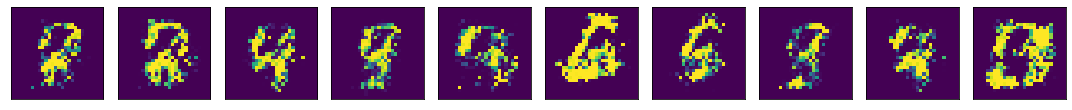

	Epoch 1
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


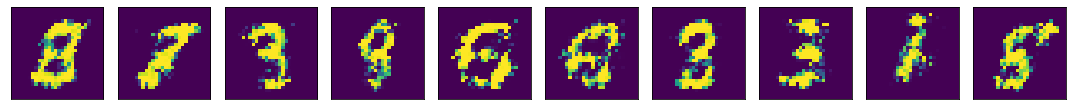

	Epoch 2
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


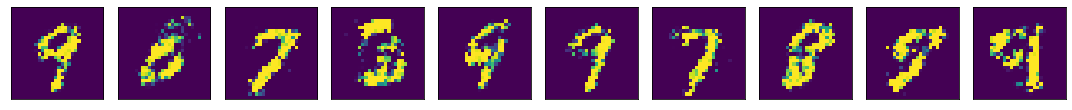

	Epoch 3
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


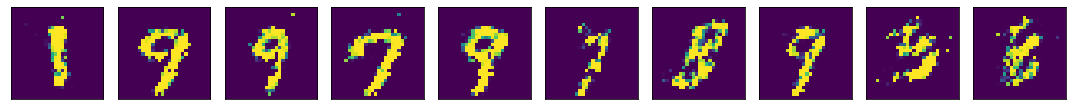

	Epoch 4
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


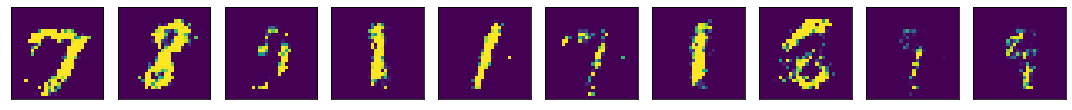

	Epoch 5
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


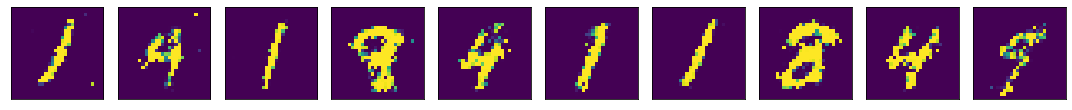

	Epoch 6
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


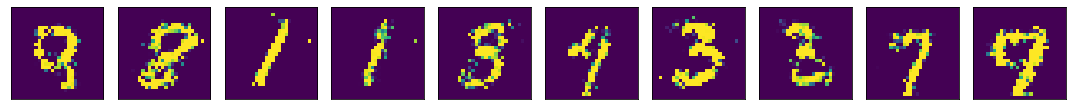

	Epoch 7
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


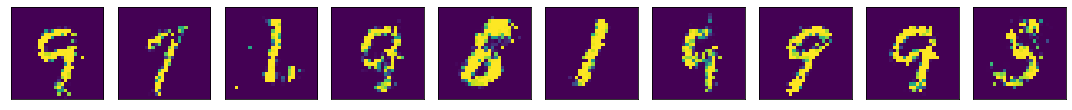

	Epoch 8
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


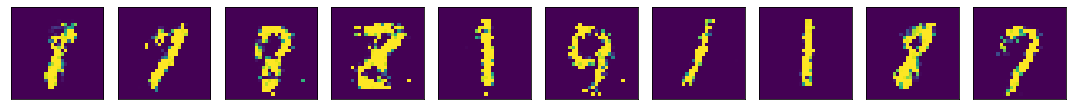

	Epoch 9
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


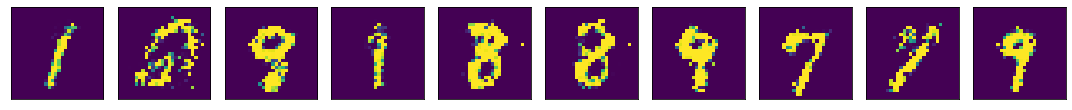

	Epoch 10
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


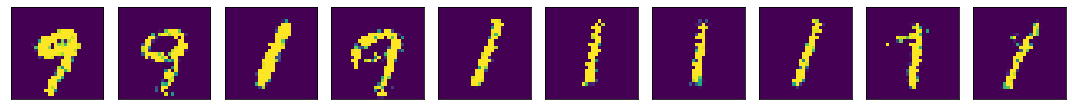

	Epoch 11
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


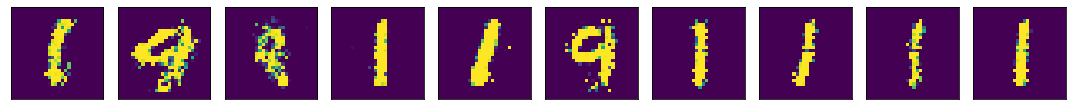

	Epoch 12
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


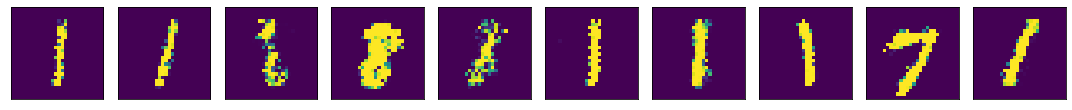

	Epoch 13
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


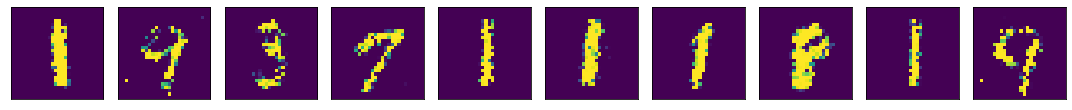

	Epoch 14
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


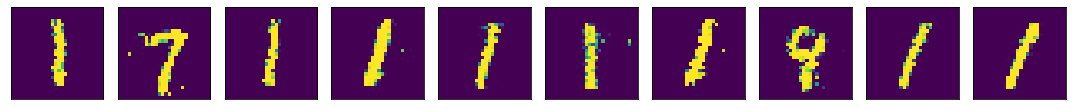

	Epoch 15
		Batch 0
		Batch 300
		Batch 600
		Batch 900
		Batch 1200
		Batch 1500
		Batch 1800


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ahsanmemon\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-4fd3a6ee9233>", line 24, in <module>
    train_gan(gan, dataset, batch_size, codings_size)
  File "<ipython-input-20-4fd3a6ee9233>", line 22, in train_gan
    gan.train_on_batch(noise, y2)
  File "C:\Users\ahsanmemon\.conda\envs\tensorflow2\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 973, in train_on_batch
    class_weight=class_weight, reset_metrics=reset_metrics)
  File "C:\Users\ahsanmemon\.conda\envs\tensorflow2\lib\site-packages\tensorflow_core\python\keras\engine\training_v2_utils.py", line 264, in train_on_batch
    output_loss_metrics=model._output_loss_metrics)
  File "C:\Users\ahsanmemon\.conda\envs\tensorflow2\lib\site-packages\tensorflow_core\python\keras\engine\training_eager.py", line 311, in train_on

KeyboardInterrupt: 

In [20]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    print("Starting the training Process")
    for epoch in range(n_epochs):
        print("\tEpoch "+str(epoch))
        
        for i, X_batch in enumerate(dataset):
            if i%300 == 0:
                print("\t\tBatch "+str(i))
            # phase 1: train the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]]*batch_size + [[1.]]*batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            
            # phase 2: training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]]*batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        show_generator_output()
train_gan(gan, dataset, batch_size, codings_size)

In [14]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15,5))
images = generator(tf.random.normal([10, codings_size]))

<Figure size 1080x360 with 0 Axes>

In [21]:
from datetime import datetime
def show_generator_output():
    fig = plt.figure(figsize=(15,5))
    images = generator(tf.random.normal([10, codings_size]))
    for i, image in zip(range(10), images):
        fig.add_subplot(1,10,i+1).imshow(image,interpolation="nearest", cmap='gray')
        plt.xticks([], [])
        plt.yticks([], [])
    plt.savefig(f"results/results_{str(datetime.now()).replace(':', '-').split('.')[0]}")
    plt.tight_layout()
    plt.show()

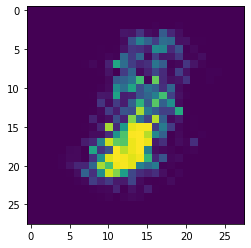

In [68]:
import matplotlib.pyplot as plt
# generated_images
noise = tf.random.normal(shape=[batch_size, codings_size])
plt.imshow(generator(noise)[0])